# The Engine of Neural Networks: Gradient-Based Optimization

Neural networks learn by minimizing a cost function, which measures how well the network is performing. Gradient-based optimization algorithms are the primary method used to find the parameters (weights and biases) of the network that minimize this cost function. This notebook will explore the core concepts behind these algorithms.

We will discuss the following topics in this notebook:
- What’s a derivative?
- Derivative of a tensor operation: the gradient
- Stochastic gradient descent
- Chaining derivatives: the Backpropagation algorithm


## What's a Derivative?

The derivative of a function measures the instantaneous rate of change of the function with respect to a variable. Geometrically, it represents the slope of the tangent line to the function's graph at a specific point.

For a function $f(x)$, the derivative with respect to $x$ is denoted as $\frac{df}{dx}$ or $f'(x)$.

**Example:**

Consider the function $f(x) = x^2$. The derivative is $f'(x) = 2x$.

In [ ]:
import sympy

x = sympy.Symbol('x')
f = x**2
derivative = sympy.diff(f, x)
print(f"The function is: {f}")
print(f"The derivative is: {derivative}")

The function is: x**2
The derivative is: 2*x


## Derivative of a Tensor Operation: The Gradient

In the context of neural networks, we work with functions that take tensors as input and produce tensors as output. The derivative of a function with respect to a tensor is called the **gradient**. The gradient is a tensor of the same shape as the input tensor, where each element represents the partial derivative of the function with respect to the corresponding element of the input tensor.

For a function $L(w)$ that takes a tensor $w$ and outputs a scalar loss $L$, the gradient of $L$ with respect to $w$ is denoted as $\nabla_w L$.

**Example:**

Consider a simple linear operation: $y = w \cdot x + b$, where $w$, $x$, and $b$ are tensors. If we have a loss function $L = (y - \text{target})^2$, we can compute the gradient of $L$ with respect to $w$.

In [ ]:
import tensorflow as tf

w = tf.Variable([[1.0, 2.0]])
x = tf.constant([[0.5], [1.5]])
b = tf.Variable([[0.1]])
target = tf.constant([[4.0]])

with tf.GradientTape() as tape:
    y = tf.matmul(w, x) + b
    loss = (y - target)**2

gradients = tape.gradient(loss, w)
print(f"Weights (w): {w.numpy()}")
print(f"Input (x): {x.numpy()}")
print(f"Bias (b): {b.numpy()}")
print(f"Target: {target.numpy()}")
print(f"Output (y): {y.numpy()}")
print(f"Loss: {loss.numpy()}")
print(f"Gradients with respect to w: {gradients.numpy()}")

Weights (w): [[1. 2.]]
Input (x): [[0.5]
 [1.5]]
Bias (b): [[0.1]]
Target: [[4.]]
Output (y): [[3.6]]
Loss: [[0.16000007]]
Gradients with respect to w: [[-0.4000001 -1.2000003]]


## Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is an iterative optimization algorithm used to minimize the cost function. Instead of computing the gradient over the entire dataset (which can be very large), SGD computes the gradient on a small randomly selected subset of the data called a **mini-batch**. This makes the update process much faster.

The update rule for SGD is:

$w_{new} = w_{old} - \alpha \nabla_w L(\text{mini-batch})$

where:
* $w_{new}$ are the updated parameters.
* $w_{old}$ are the current parameters.
* $\alpha$ is the learning rate, a hyperparameter that controls the step size.
* $\nabla_w L(\text{mini-batch})$ is the gradient of the loss function computed on the mini-batch.

**Visualization of Gradient Descent (Conceptual):**

Imagine a ball rolling down a hill. The ball will naturally move in the direction of the steepest descent, which is opposite to the gradient. SGD works similarly, adjusting the parameters in the direction that reduces the loss function.

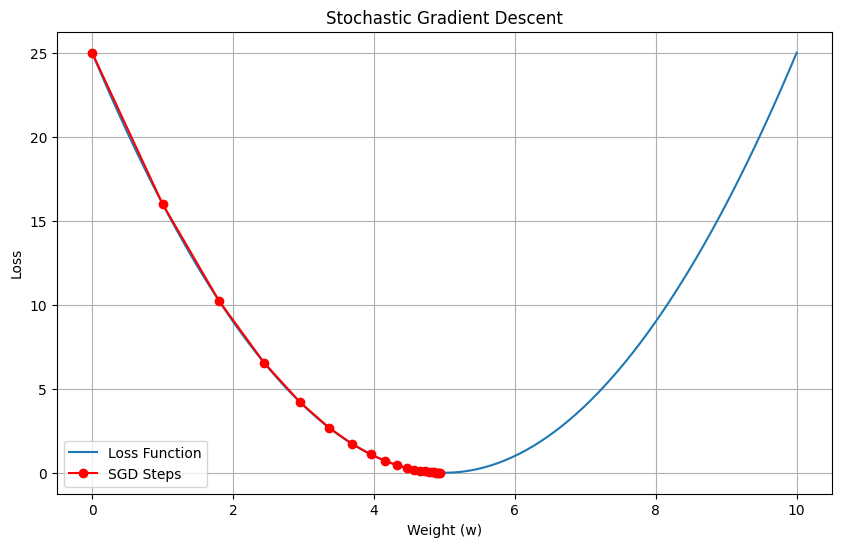

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simple example of a loss function
def loss_function(w):
    return (w - 5)**2

# Gradient of the loss function
def gradient(w):
    return 2 * (w - 5)

# SGD implementation
def sgd(initial_w, learning_rate, num_iterations):
    w = initial_w
    w_history = [w]
    for _ in range(num_iterations):
        grad = gradient(w)
        w = w - learning_rate * grad
        w_history.append(w)
    return w_history

# Run SGD
initial_weight = 0
learning_rate = 0.1
num_iterations = 20
weight_history = sgd(initial_weight, learning_rate, num_iterations)

# Plotting
w_values = np.linspace(0, 10, 100)
loss_values = loss_function(w_values)

plt.figure(figsize=(10, 6))
plt.plot(w_values, loss_values, label='Loss Function')
plt.plot(weight_history, [loss_function(w) for w in weight_history], 'o-', color='red', label='SGD Steps')
plt.xlabel('Weight (w)')
plt.ylabel('Loss')
plt.title('Stochastic Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

## Chaining Derivatives: The Backpropagation Algorithm

Neural networks consist of multiple layers of operations. To compute the gradient of the loss function with respect to the parameters in the early layers, we need to apply the chain rule of calculus. The **backpropagation algorithm** is an efficient way to compute these gradients by applying the chain rule iteratively, starting from the output layer and moving backward through the network.

The chain rule states that if $z = f(y)$ and $y = g(x)$, then $\frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx}$.

In backpropagation, this translates to computing the gradient of the loss with respect to a parameter in a layer by multiplying the gradient of the loss with respect to the output of that layer by the gradient of the output of that layer with respect to the parameter.

**Conceptual Flow of Backpropagation:**

1. **Forward Pass:** Input data is fed through the network, and the output is computed.
2. **Compute Loss:** The loss function is calculated based on the predicted output and the true target.
3. **Backward Pass (Backpropagation):**
    * Compute the gradient of the loss with respect to the output of the last layer.
    * Use the chain rule to compute the gradients of the loss with respect to the parameters and outputs of the preceding layers, moving backward through the network.
    * Store the gradients for each parameter.
4. **Update Parameters:** Use an optimization algorithm like SGD to update the parameters based on the computed gradients.

Deep learning frameworks like TensorFlow and PyTorch automatically handle the backpropagation process using automatic differentiation.

## Summary and Conclusion

This notebook explored the fundamental concepts behind gradient-based optimization, the engine driving the learning process in neural networks. We covered:

*   **Derivatives and Gradients:** How they measure the rate of change of functions, extending to tensors for neural network parameters.
*   **Stochastic Gradient Descent (SGD):** An iterative algorithm that uses mini-batches to efficiently update parameters based on gradients.
*   **Backpropagation:** The chain rule-based algorithm for efficiently computing gradients in multi-layer networks.

Understanding these concepts is crucial for comprehending how neural networks learn and how to effectively train them. While SGD is a foundational algorithm, many more advanced optimization techniques exist, building upon these core ideas to achieve faster convergence and better performance.